In [1]:
# Modules :

from pyforest import *
from tqdm import tqdm
import warnings
from IPython.display import Image
import re
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from prettytable import PrettyTable
warnings.filterwarnings("ignore")
%matplotlib inline

![title](Merchant_Banking.png)

# AmExpert 2019 – Machine Learning Hackathon


## Introduction
American Express and Analytics Vidhya presents “AmExpert 2019 – Machine Learning Hackathon”. An amazing opportunity to showcase your analytical abilities and talent.

Get a taste of the kind of challenges we face here at American Express on day to day basis.

Exciting prizes up for grabs! Best performers also get a chance to get interviewed by American Express for analytics roles!

Don’t hold on to the buzzing ideas in your mind. Just wear your thinking hats and display the spectrum of your creativity!


# Problem Statement

## Predicting Coupon Redemption

XYZ Credit Card company regularly helps it’s merchants understand their data better and take key business decisions accurately by providing machine learning and analytics consulting. ABC is an established Brick & Mortar retailer that frequently conducts marketing campaigns for its diverse product range. As a merchant of XYZ, they have sought XYZ to assist them in their discount marketing process using the power of machine learning. Can you wear the AmExpert hat and help out ABC?

 
Discount marketing and coupon usage are very widely used promotional techniques to attract new customers and to retain & reinforce loyalty of existing customers. The measurement of a consumer’s propensity towards coupon usage and the prediction of the redemption behaviour are crucial parameters in assessing the effectiveness of a marketing campaign.

 
ABC’s promotions are shared across various channels including email, notifications, etc. A number of these campaigns include coupon discounts that are offered for a specific product/range of products. The retailer would like the ability to predict whether customers redeem the coupons received across channels, which will enable the retailer’s marketing team to accurately design coupon construct, and develop more precise and targeted marketing strategies.

 
The data available in this problem contains the following information, including the details of a sample of campaigns and coupons used in previous campaigns -

**User Demographic Details**

**Campaign and coupon Details**

**Product details**

**Previous transactions**


Based on previous transaction & performance data from the last 18 campaigns, predict the probability for the next 10 campaigns in the test set for each coupon and customer combination, whether the customer will redeem the coupon or not?

 

### Dataset Description

Here is the schema for the different data tables available. The detailed data dictionary is provided next.

![title](amex19.png)

You are provided with the following files in train.zip:

**train.csv:** Train data containing the coupons offered to the given customers under the 18 campaigns

|Variable |Definition |
|----|----|
|id	|Unique id for coupon customer impression|
|campaign_id	|Unique id for a discount campaign|
|coupon_id	|Unique id for a discount coupon|
|customer_id	|Unique id for a customer|
|redemption_status|	(target) (0 - Coupon not redeemed, 1 - Coupon redeemed) |


**campaign_data.csv:** Campaign information for each of the 28 campaigns

|Variable|	Definition|
|----|----|
|campaign_id	|Unique id for a discount campaign|
|campaign_type	|Anonymised Campaign Type (X/Y)|
|start_date	|Campaign Start Date|
|end_date	|Campaign End Date |


**coupon_item_mapping.csv:** Mapping of coupon and items valid for discount under that coupon

|Variable|	Definition|
|----|----|
|coupon_id	|Unique id for a discount coupon (no order)|
|item_id	|Unique id for items for which given coupon is valid (no order) |


**customer_demographics.csv:** Customer demographic information for some customers

|Variable	|Definition|
|----|----|
|customer_id	|Unique id for a customer|
|age_range	|Age range of customer family in years|
|marital_status|	Married/Single|
|rented|	0 - not rented accommodation, 1 - rented accommodation|
|family_size|	Number of family members|
|no_of_children	|Number of children in the family|
|income_bracket|	Label Encoded Income Bracket (Higher income corresponds to higher number) |


**customer_transaction_data.csv:** Transaction data for all customers for duration of campaigns in the train data

|Variable	|Definition|
|----|----|
|date	|Date of Transaction|
|customer_id|Unique id for a customer|
|item_id|	Unique id for item|
|quantity	|quantity of item bought|
|selling_price	|Sales value of the transaction|
|other_discount|	Discount from other sources such as manufacturer coupon/loyalty card|
|coupon_discount|	Discount availed from retailer coupon |


**item_data.csv:** Item information for each item sold by the retailer

|Variable|	Definition|
|----|----|
|item_id|	Unique id for itemv
|brand	|Unique id for item brand|
|brand_type	|Brand Type (local/Established)|
|category	|Item Category |


**test.csv:** Contains the coupon customer combination for which redemption status is to be predicted

|Variable|	Definition|
|----|----|
|id	|Unique id for coupon customer impression|
|campaign_id	|Unique id for a discount campaign|
|coupon_id	|Unique id for a discount coupon|
|customer_id	|Unique id for a customer |

*Campaign, coupon and customer data for test set is also contained in train.zip *

**sample_submission.csv:** This file contains the format in which you have to submit your predictions.

To summarise the entire process:

* Customers receive coupons under various campaigns and may choose to redeem it.
* They can redeem the given coupon for any valid product for that coupon as per coupon item mapping within the duration between campaign start date and end date
* Next, the customer will redeem the coupon for an item at the retailer store and that will reflect in the transaction table in the column coupon_discount.
 
### Evaluation Metric
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.
 

### Public and Private Split
* Test data is further randomly divided into Public (40%) and Private data (60%)
* Your initial responses will be checked and scored on the Public data.
* The final rankings would be based on your private score which will be published once the competition is over.

In [2]:
# Importing Datasets :

campaign_data = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\campaign_data.csv')
coupon_item_mapping = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\coupon_item_mapping.csv')
customer_demographs = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\customer_demographics.csv')
customer_transaction_data = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\customer_transaction_data.csv')
item_data = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\item_data.csv')
train = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\train.csv')
test = pd.read_csv(r'D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Datasets\test.csv')

<h2>OBJECTIVE :</h2>

Based on previous transaction & performance data from the last **18** campaigns, predict the probability for the next **10** campaigns in the test set for each coupon and customer combination, whether the customer will redeem the coupon or not?

<h2>Performing EDA for </h2>

+ Campaign_Data
+ Coupon_Item_Mapping
+ Item_data
+ Customer_Transaction_Data 

### *Campaign Data :* 

In [3]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [4]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [5]:
len(campaign_data)

28

In [6]:
# Total no of unique campaign ids :

campaign_data.campaign_id.nunique()

28

In [7]:
# For train set, there are 18 campaign_ids and therefore we need to predict for 10 campigns of the test set :

count_by_train = 0

for each in train.campaign_id.unique():
    if each in campaign_data.campaign_id.unique():
        count_by_train+=1
        
print('count_by_train : ', count_by_train)

count_by_test = 0

for each in test.campaign_id.unique():
    if each in campaign_data.campaign_id.unique():
        count_by_test+=1
        
print('count_by_test : ', count_by_test)

count_by_train :  18
count_by_test :  10


In [8]:
# FEATURE - Campaign_Type :

print('Unique No of campaign_type :', campaign_data.campaign_type.nunique())
print('Types No of campaign_type :', campaign_data.campaign_type.unique())

Unique No of campaign_type : 2
Types No of campaign_type : ['Y' 'X']


In [9]:
# Converting to datetime for the 'start_date' and the 'end_date' of the campaigns :

campaign_data.start_date = pd.to_datetime(campaign_data.start_date)
campaign_data.end_date = pd.to_datetime(campaign_data.end_date)

In [10]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,2013-10-21,2013-12-20
1,25,Y,2013-10-21,2013-11-22
2,20,Y,2013-07-09,2013-11-16
3,23,Y,2013-08-10,2013-11-15
4,21,Y,2013-09-16,2013-10-18


## *Train Data:*

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
dtypes: int64(5)
memory usage: 3.0 MB


In [12]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [13]:
len(train)

78369

In [14]:
# More than one data points of each customer(customer_id) :

train.groupby('customer_id').agg({'customer_id':'count'}).head() # COUNT 

,customer_id
customer_id,
1,94
3,42
4,23
5,52
6,32


>   In train data, more than 1 data point is present for the same customer_id

>   More than one type of coupon is applied by each customer over the campaigns

## *Customer Transaction Data:*

In [15]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [16]:
# More than one data points of each customer(customer_id) :

customer_transaction_data.groupby('customer_id').agg({'customer_id':'count'}).head() # COUNT 

,customer_id
customer_id,
1,1048
2,419
3,705
4,220
5,792


>   In customer_transaction_data, more than 1 data point is present for the same customer_id.

>   More than one transaction has been performed by each customer over the campaigns.

In [17]:
# Aggregrating transaction featurs for each customer_id(customer) :

# More than one data points of each customer(customer_id) :

customer_transaction_data_groupBy = customer_transaction_data.groupby('customer_id').agg({'selling_price':['mean', 'max', 'min', 'sum'],
                                                     'other_discount':['mean', 'max', 'min', 'sum'],
                                                      'coupon_discount':['mean', 'max', 'min', 'sum']})  

In [18]:
customer_transaction_data_groupBy.reset_index(inplace=True)
customer_transaction_data_groupBy.head()

customer_id selling_price                            other_discount       \
                       mean      max    min        sum           mean  max   
0           1     94.001842   445.25  12.11   98513.93     -16.250382  0.0   
1           2    102.864033   640.80  14.25   43100.03     -16.830430  0.0   
2           3    103.617404   862.00   8.90   73050.27     -22.714227  0.0   
3           4    154.423727  1330.05  14.25   33973.22     -13.305409  0.0   
4           5    130.827146  1485.35  12.11  103615.10     -13.657917  0.0   

                    coupon_discount                        
      min       sum            mean  max     min      sum  
0 -372.23 -17030.40       -2.019876  0.0 -106.86 -2116.83  
1 -312.03  -7051.95       -0.595084  0.0  -89.05  -249.34  
2 -463.06 -16013.53       -3.091546  0.0 -142.48 -2179.54  
3 -390.04  -2927.19       -0.404773  0.0  -89.05   -89.05  
4 -216.21 -10817.07       -0.114684  0.0  -71.24   -90.83

## *Customer Demographs:*

In [19]:
customer_demographs.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [20]:
customer_demographs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


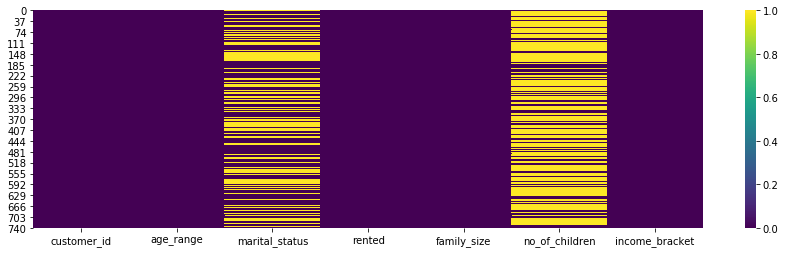

In [21]:
plt.figure(figsize=(15, 4))
sns.heatmap(customer_demographs.isnull(), cmap='viridis')  # Nulls 

> Nulls in feature <i>**'no_of_childres'**</i> & <i>***'marital_status'***</i> 

**Imputation - 'no_of_children' & 'marital_status'**

In [22]:
customer_demographs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [23]:
# Replacing the 'NaN' with string 'NaN' for analysing distributions :

customer_demographs['no_of_children'] = customer_demographs['no_of_children'].apply(lambda x:'NaN' if str(x)=='nan' else x)
customer_demographs['marital_status'] = customer_demographs['marital_status'].apply(lambda x:'NaN' if str(x)=='nan' else x)

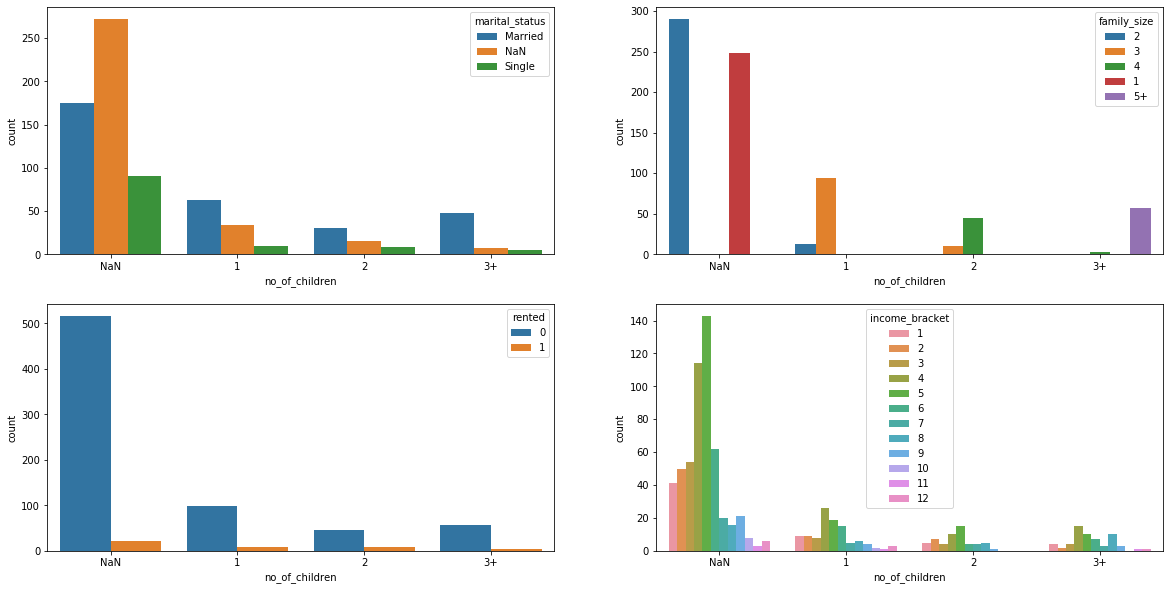

In [24]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
sns.countplot(data=customer_demographs, x='no_of_children', hue='marital_status')

plt.subplot(2,2,2)
sns.countplot(data=customer_demographs, x='no_of_children', hue='family_size')

plt.subplot(2,2,3)
sns.countplot(data=customer_demographs, x='no_of_children', hue='rented')

plt.subplot(2,2,4)
sns.countplot(data=customer_demographs, x='no_of_children', hue='income_bracket')

From the 2nd plot, we infer that as no_of_children increases, family size increases

In [25]:
# NaN in both the features :

len(customer_demographs[(customer_demographs['no_of_children'].isnull()) & (customer_demographs['marital_status'].isnull())])

0

In [26]:
len(customer_demographs[customer_demographs['no_of_children'].isnull()])

0

In [27]:
len(customer_demographs[customer_demographs['marital_status'].isnull()])

0

<font color='darkblue'><b><i>We shall impute these Nulls using ML model itself later as the no of data points are too less to impute by any logic </i></b></font>

In [28]:
# unique customer_ids in train set:

train.customer_id.nunique()

1428

In [29]:
# unique customer_ids in customer_demographs set:

customer_demographs.customer_id.nunique()

760

In [30]:
# Check for no of 'customer_ids' in 'train' set to exist in the 'customer_demographs' set :

no_of_common_cust_ids = 0

for each_cust_id in train.customer_id.unique():
    
    if each_cust_id in customer_demographs.customer_id.unique():
        no_of_common_cust_ids+=1

print('No of common customer_ids for data points :', no_of_common_cust_ids)
print('No of customer_ids present in train but not in customer_demographs :', train.customer_id.nunique() - no_of_common_cust_ids)

No of common customer_ids for data points : 703
No of customer_ids present in train but not in customer_demographs : 725


In [31]:
# Replacing the 'NaN' with string 'NaN' for analysing distributions :

customer_demographs['no_of_children'] = customer_demographs['no_of_children'].apply(lambda x:np.NaN if str(x)=='NaN' else x)
customer_demographs['marital_status'] = customer_demographs['marital_status'].apply(lambda x:np.NaN if str(x)=='NaN' else x)

### *Item_Data :*

In [32]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [33]:
item_data.shape

(74066, 4)

In [34]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
item_id       74066 non-null int64
brand         74066 non-null int64
brand_type    74066 non-null object
category      74066 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [35]:
item_data.groupby('brand_type').agg({'brand_type':['count']})

,brand_type
,count
brand_type,
Established,62842
Local,11224


In [36]:
item_data.groupby('category').agg({'brand_type':'count'})

,brand_type
category,
Alcohol,303
Bakery,1679
"Dairy, Juices & Snacks",2425
Flowers & Plants,664
Fuel,14
Garden,102
Grocery,32448
Meat,2080
Miscellaneous,385


### *Coupon_item_mapping & Item_Data :*

In [37]:
coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [38]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [39]:
coup_MERGED_item = coupon_item_mapping.merge(item_data, how='inner', on='item_id')

In [40]:
coup_MERGED_item.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,6,37,56,Local,Grocery
2,22,37,56,Local,Grocery
3,31,37,56,Local,Grocery
4,107,75,56,Local,Grocery


In [41]:
coup_MERGED_item.brand_type.value_counts()

Established    78759
Local          13904
Name: brand_type, dtype: int64

In [42]:
coup_MERGED_item.category.value_counts()

Grocery                   36466
Pharmaceutical            25061
Natural Products           6819
Meat                       6218
Packaged Meat              6144
Skin & Hair Care           4924
Seafood                    2227
Flowers & Plants           1963
Dairy, Juices & Snacks     1867
Garden                      286
Prepared Food               240
Miscellaneous               184
Bakery                      100
Salads                      100
Travel                       44
Vegetables (cut)             19
Restauarant                   1
Name: category, dtype: int64

In [43]:
coup_MERGED_item_groupBy = coup_MERGED_item.groupby('coupon_id').agg({'category':'count'})
coup_MERGED_item_groupBy.reset_index(inplace=True)
coup_MERGED_item_groupBy.head()  # The 'coupon_id' being applied to how many 'category'of products

,coupon_id,category
0,1,39
1,2,2
2,3,17
3,4,24
4,5,7


>   One coupon (coupon_id) gets applied on more than one type of item_id and each item_id can have different **(brand_type+category)**

### *Preparing the train set :* 

In [44]:
# train_latest = train + campaign_data :

train_MERGED_campaign_data = train.merge(campaign_data, how='left', on='campaign_id')
train_MERGED_campaign_data.shape

(78369, 8)

In [45]:
train_MERGED_campaign_data.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
campaign_type        0
start_date           0
end_date             0
dtype: int64

In [46]:
# train_latest = train_latest + coup_merged_item
train_MERGED_campaign_data_MERGED_coupon = train_MERGED_campaign_data.merge(coup_MERGED_item_groupBy, how='left', on='coupon_id') 
train_MERGED_campaign_data_MERGED_coupon.shape

(78369, 9)

In [47]:
train_MERGED_campaign_data_MERGED_coupon.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
campaign_type        0
start_date           0
end_date             0
category             0
dtype: int64

In [48]:
# train_latest = train_latest + customer_dempgraphs
train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics = train_MERGED_campaign_data_MERGED_coupon.merge(customer_demographs, 
                                                                                                                      how='left', on='customer_id')
train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics.shape                                                                        

(78369, 15)

In [49]:
train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics.isnull().sum()

id                       0
campaign_id              0
coupon_id                0
customer_id              0
redemption_status        0
campaign_type            0
start_date               0
end_date                 0
category                 0
age_range            34708
marital_status       52975
rented               34708
family_size          34708
no_of_children       64313
income_bracket       34708
dtype: int64

In [50]:
# train_latest = train_latest + customer_transaction_data_merged_item_data
train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics_MERGED_customer_transaction_data = train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics.merge(customer_transaction_data_groupBy, 
                                                                                                                      how='left', 
                                                                                                                      on='customer_id')
train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics_MERGED_customer_transaction_data.shape

(78369, 27)

In [51]:
train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics_MERGED_customer_transaction_data.isnull().sum()

id                             0
campaign_id                    0
coupon_id                      0
customer_id                    0
redemption_status              0
campaign_type                  0
start_date                     0
end_date                       0
category                       0
age_range                  34708
marital_status             52975
rented                     34708
family_size                34708
no_of_children             64313
income_bracket             34708
(selling_price, mean)          0
(selling_price, max)           0
(selling_price, min)           0
(selling_price, sum)           0
(other_discount, mean)         0
(other_discount, max)          0
(other_discount, min)          0
(other_discount, sum)          0
(coupon_discount, mean)        0
(coupon_discount, max)         0
(coupon_discount, min)         0
(coupon_discount, sum)         0
dtype: int64

In [52]:
# final train_set :

train_df = train_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics_MERGED_customer_transaction_data
train_df.shape

(78369, 27)

In [53]:
train_df.isnull().sum()

id                             0
campaign_id                    0
coupon_id                      0
customer_id                    0
redemption_status              0
campaign_type                  0
start_date                     0
end_date                       0
category                       0
age_range                  34708
marital_status             52975
rented                     34708
family_size                34708
no_of_children             64313
income_bracket             34708
(selling_price, mean)          0
(selling_price, max)           0
(selling_price, min)           0
(selling_price, sum)           0
(other_discount, mean)         0
(other_discount, max)          0
(other_discount, min)          0
(other_discount, sum)          0
(coupon_discount, mean)        0
(coupon_discount, max)         0
(coupon_discount, min)         0
(coupon_discount, sum)         0
dtype: int64

In [54]:
# Rectifying columns in train :
feature_list_train = [str(each_train_col[0]+"_"+each_train_col[1]) if str(type(each_train_col))=="<class 'tuple'>" else each_train_col  for each_train_col in train_df.columns ]

# rectifying column names :
train_df.columns = feature_list_train

In [55]:
train_df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,category,age_range,...,selling_price_min,selling_price_sum,other_discount_mean,other_discount_max,other_discount_min,other_discount_sum,coupon_discount_mean,coupon_discount_max,coupon_discount_min,coupon_discount_sum
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,125,46-55,...,17.45,57120.75,-33.168935,0.0,-890.50,-10282.37,-0.287258,0.0,-89.05,-89.05
1,2,13,116,48,0,X,2013-05-19,2013-05-07,3,36-45,...,7.12,90185.10,-27.699169,0.0,-372.23,-10664.18,-3.215039,0.0,-213.72,-1237.79
2,6,9,635,205,0,Y,2013-11-03,2013-12-04,67,46-55,...,17.45,117461.66,-17.795660,0.0,-468.05,-17261.79,-2.212082,0.0,-89.05,-2145.72
3,7,13,644,1050,0,X,2013-05-19,2013-05-07,4,NaN,...,13.89,23291.42,-16.655570,0.0,-312.03,-3947.37,-0.751477,0.0,-89.05,-178.10
4,9,8,1017,1489,0,X,2013-02-16,2013-05-04,32,46-55,...,8.90,67797.49,-20.524733,0.0,-320.22,-11534.90,-0.471548,0.0,-53.43,-265.01


In [56]:
# Feature engineering timedelta(days) from campaign_start and end_dates for train and test sets :

train_df['Gap_days_campaign'] = train_df['end_date'] - train_df['start_date'] 
train_df['Gap_days_campaign'] = train_df['Gap_days_campaign'].apply(lambda timedelta:int(np.abs(timedelta.days)))

### *Preparing the test set :* 

In [57]:
test.shape

(50226, 4)

In [58]:
# test_latest = test + campaign_data 

test_MERGED_campaign_data = test.merge(campaign_data, how='left', on='campaign_id')
test_MERGED_campaign_data.shape

# test_latest = test_latest + coup_merged_item
test_MERGED_campaign_data_MERGED_coupon = test_MERGED_campaign_data.merge(coup_MERGED_item_groupBy, how='left', on='coupon_id') 
# test_MERGED_campaign_data_MERGED_coupon.shape

# test_latest = test_latest + customer_dempgraphs
test_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics = test_MERGED_campaign_data_MERGED_coupon.merge(customer_demographs, 
                                                                                                                      how='left', on='customer_id')
test_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics.shape                                                                        

# test_latest = test_latest + customer_transaction_data_merged_item_data
test_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics_MERGED_customer_transaction_data = test_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics.merge(customer_transaction_data_groupBy, 
                                                                                                                      how='left', 
                                                                                                                      on='customer_id')
# test_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics_MERGED_customer_transaction_data.shape

# final test_set :

test_df = test_MERGED_campaign_data_MERGED_coupon_MERGED_customer_demographics_MERGED_customer_transaction_data
test_df.shape

(50226, 26)

In [59]:
# Feature engineering timedelta(days) from campaign_start and end_dates for train and test sets :

test_df['Gap_days_campaign'] = test_df['end_date'] - test_df['start_date'] 
test_df['Gap_days_campaign'] = test_df['Gap_days_campaign'].apply(lambda timedelta:int(np.abs(timedelta.days)))

In [60]:
# Rectifying columns in test :

feature_list_test = [str(each_test_col[0]+"_"+each_test_col[1]) if str(type(each_test_col))=="<class 'tuple'>" else each_test_col for each_test_col in test_df.columns]

In [61]:
# Assigning proper columns names :

test_df.columns = feature_list_test

In [62]:
# Eliminating irrelvant features in the test set :

del test_df['id']
del test_df['campaign_id']
del test_df['customer_id']
del test_df['coupon_id']
del test_df['start_date']
del test_df['end_date']

In [63]:
test_df.isnull().sum()

campaign_type               0
category                    0
age_range               19287
marital_status          32144
rented                  19287
family_size             19287
no_of_children          40064
income_bracket          19287
selling_price_mean          0
selling_price_max           0
selling_price_min           0
selling_price_sum           0
other_discount_mean         0
other_discount_max          0
other_discount_min          0
other_discount_sum          0
coupon_discount_mean        0
coupon_discount_max         0
coupon_discount_min         0
coupon_discount_sum         0
Gap_days_campaign           0
dtype: int64

## <font color='red'>Feature imputation using Modelling Approach :</font>

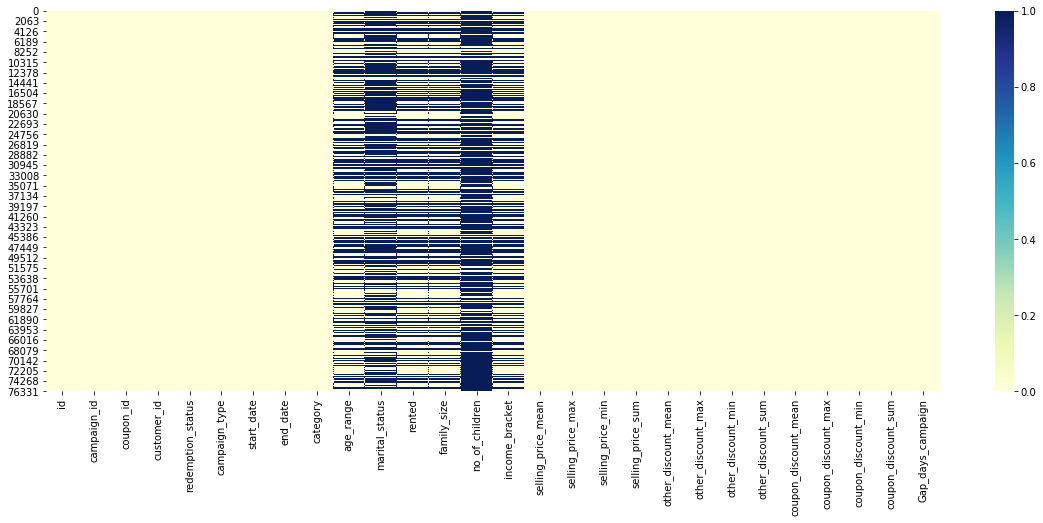

In [64]:
plt.figure(figsize=(20, 7))
sns.heatmap(train_df.isnull(), cmap="YlGnBu")

In [65]:
train_df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,category,age_range,...,selling_price_sum,other_discount_mean,other_discount_max,other_discount_min,other_discount_sum,coupon_discount_mean,coupon_discount_max,coupon_discount_min,coupon_discount_sum,Gap_days_campaign
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,125,46-55,...,57120.75,-33.168935,0.0,-890.50,-10282.37,-0.287258,0.0,-89.05,-89.05,12
1,2,13,116,48,0,X,2013-05-19,2013-05-07,3,36-45,...,90185.10,-27.699169,0.0,-372.23,-10664.18,-3.215039,0.0,-213.72,-1237.79,12
2,6,9,635,205,0,Y,2013-11-03,2013-12-04,67,46-55,...,117461.66,-17.795660,0.0,-468.05,-17261.79,-2.212082,0.0,-89.05,-2145.72,31
3,7,13,644,1050,0,X,2013-05-19,2013-05-07,4,NaN,...,23291.42,-16.655570,0.0,-312.03,-3947.37,-0.751477,0.0,-89.05,-178.10,12
4,9,8,1017,1489,0,X,2013-02-16,2013-05-04,32,46-55,...,67797.49,-20.524733,0.0,-320.22,-11534.90,-0.471548,0.0,-53.43,-265.01,77


In [66]:
train_df.isnull().sum()

id                          0
campaign_id                 0
coupon_id                   0
customer_id                 0
redemption_status           0
campaign_type               0
start_date                  0
end_date                    0
category                    0
age_range               34708
marital_status          52975
rented                  34708
family_size             34708
no_of_children          64313
income_bracket          34708
selling_price_mean          0
selling_price_max           0
selling_price_min           0
selling_price_sum           0
other_discount_mean         0
other_discount_max          0
other_discount_min          0
other_discount_sum          0
coupon_discount_mean        0
coupon_discount_max         0
coupon_discount_min         0
coupon_discount_sum         0
Gap_days_campaign           0
dtype: int64

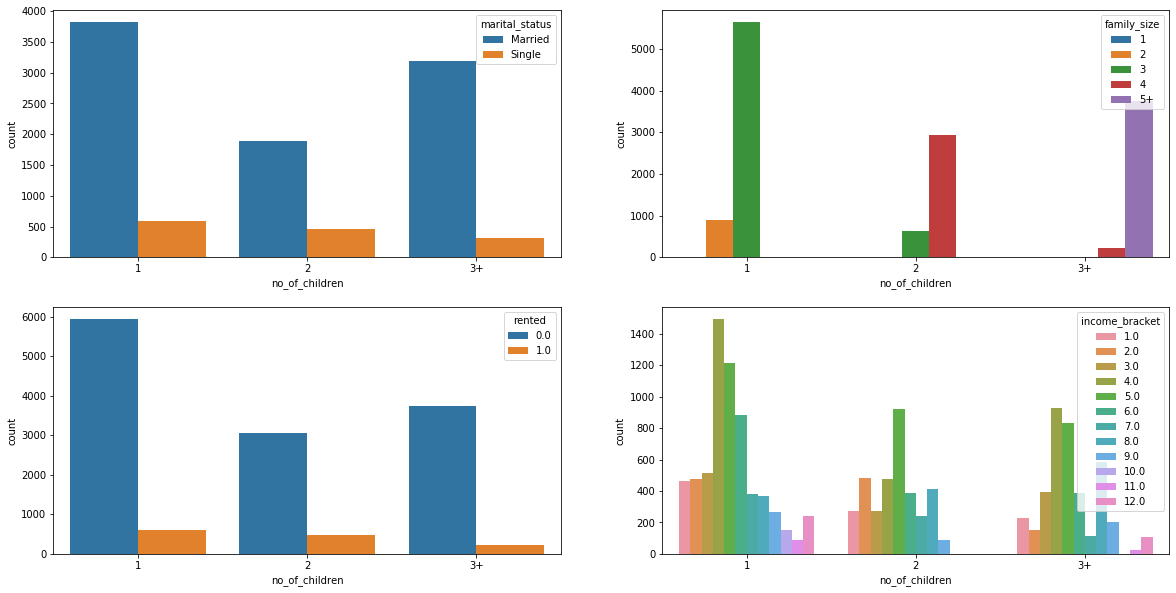

In [67]:
# Excluding nulls :

plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
sns.countplot(data=train_df, x='no_of_children', hue='marital_status')

plt.subplot(2,2,2)
sns.countplot(data=train_df, x='no_of_children', hue='family_size')

plt.subplot(2,2,3)
sns.countplot(data=train_df, x='no_of_children', hue='rented')

plt.subplot(2,2,4)
sns.countplot(data=train_df, x='no_of_children', hue='income_bracket')

> <h3> Train set features to impute :</h3>

+ age_range               
+ marital_status          
+ rented                  
+ family_size             
+ no_of_children          
+ income_bracket          

In [68]:
# removing irrelevant features from the train set:

del train_df['id']
del train_df['campaign_id']
del train_df['customer_id']
del train_df['coupon_id']
del train_df['start_date']
del train_df['end_date']

# redemption_status= train_df['redemption_status'] # storing the 'y' dependent variable, in separete variable :
# del train_df['redemption_status']  # deleting the dependent variale

In [228]:
# Utilization of the features in incremental way to achieve imputation in the 'after' features : 
# The models will be used exactly in the same step as they were used for imputation in the train set :

table = PrettyTable()
table.field_names = ['FeatureToImpute', 'redemption_status','age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_Bracket']

table.align["FeatureToImpute "] = "L"
table.align["redemption_status"] = "L"
table.align["age_range"] = "R"
table.align["marital_status "] = "R"
table.align["rented"] = "R"
table.align["family_size"] = "R"
table.align["no_of_children"] = "R"
table.align["income_bracket"] = "L"


table.add_row(['age_range','N/A', 'N/A', 'X' , 'X' , 'X' , 'X' , 'X'  ])

table.add_row(['marital_status','N/A', '✓', 'N/A', 'X' , 'X' , 'X' , 'X' ])

table.add_row(['rented','N/A', '✓', '✓', 'N/A', 'X' , 'X' , 'X' ])

table.add_row(['family_size','N/A', '✓', '✓', '✓', 'N/A', 'X' , 'X' ])

table.add_row(['no_of_children', 'N/A', '✓', '✓', '✓', '✓', 'N/A', 'X' ])

table.add_row(['income_bracket', 'N/A', '✓', '✓', '✓', '✓', '✓', 'N/A'])

print(table)

+-----------------+-------------------+-----------+----------------+--------+-------------+----------------+----------------+
| FeatureToImpute | redemption_status | age_range | marital_status | rented | family_size | no_of_children | income_Bracket |
+-----------------+-------------------+-----------+----------------+--------+-------------+----------------+----------------+
|    age_range    |        N/A        |    N/A    |       X        |   X    |      X      |       X        |       X        |
|  marital_status |        N/A        |     ✓     |      N/A       |   X    |      X      |       X        |       X        |
|      rented     |        N/A        |     ✓     |       ✓        |  N/A   |      X      |       X        |       X        |
|   family_size   |        N/A        |     ✓     |       ✓        |   ✓    |     N/A     |       X        |       X        |
|  no_of_children |        N/A        |     ✓     |       ✓        |   ✓    |      ✓      |      N/A       |       X  

> <h2>Imputing feature <font color='red'> 'age_range' </font> for the train set :</h2>

In [70]:
# One hot encoding 'campaign_type' feature :

train_df = pd.concat([train_df, pd.get_dummies(train_df['campaign_type'])], axis=1)
del train_df['campaign_type'] # has been one hot encoded, hence not required as a single feature
train_df.shape

(78369, 23)

In [71]:
# Separate dataframe containing each features null and feature 'age_range' removed from the above created dataset :

X_train_impute_age_range = train_df.ix[train_df['age_range'].notnull()] # where age_range is notNull

# The following features are not considered for as a training set feature for 'age_range' imputation becoz they themselves contain Nulls 


# Redemption_status not an inpput feature as it will not be present in the test set and,
# the models used for imuting in train set will be used for test set imputation as well 

X_train_redemption_status = X_train_impute_age_range['redemption_status']
del X_train_impute_age_range['redemption_status']

X_train_marital_status = X_train_impute_age_range['marital_status']
del X_train_impute_age_range['marital_status']

X_train_rented = X_train_impute_age_range['rented']
del X_train_impute_age_range['rented']

X_train_family_size = X_train_impute_age_range['family_size']
del X_train_impute_age_range['family_size']

X_train_no_of_children = X_train_impute_age_range['no_of_children']
del X_train_impute_age_range['no_of_children']

X_train_income_bracket = X_train_impute_age_range['income_bracket'] 
del X_train_impute_age_range['income_bracket']


y_train_age_range = X_train_impute_age_range['age_range']  # y variable i.e. age_range(with all notNull values)
del X_train_impute_age_range['age_range']  # removing the y variable from the learning_set 

In [72]:
# X_train_impute_age_range shape :

X_train_impute_age_range.shape

(43661, 16)

In [73]:
X_train_impute_age_range.isnull().sum()

category                0
selling_price_mean      0
selling_price_max       0
selling_price_min       0
selling_price_sum       0
other_discount_mean     0
other_discount_max      0
other_discount_min      0
other_discount_sum      0
coupon_discount_mean    0
coupon_discount_max     0
coupon_discount_min     0
coupon_discount_sum     0
Gap_days_campaign       0
X                       0
Y                       0
dtype: int64

In [74]:
# Imputation using Model for 'age_range' features :

logisticRegression_age_range = LogisticRegression()
logisticRegression_age_range.fit(X_train_impute_age_range, y_train_age_range)  # LR fitted with X, y 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
# TO PREDICT ON : Where 'age_range' feature is null :
# X_test_impute_age_range contains

X_test_impute_age_range = train_df.ix[train_df['age_range'].isnull()] # all the points containing 'age_range' Nulls


# Redemption_status not an inpput feature as it will not be present in the test set and,
# the models used for imuting in train set will be used for test set imputation as well 

X_test_redemption_status = X_test_impute_age_range['redemption_status']
del X_test_impute_age_range['redemption_status']



X_test_marital_status = X_test_impute_age_range['marital_status']
del X_test_impute_age_range['marital_status']

X_test_rented = X_test_impute_age_range['rented']
del X_test_impute_age_range['rented']

X_test_family_size = X_test_impute_age_range['family_size']
del X_test_impute_age_range['family_size']

X_test_no_of_children = X_test_impute_age_range['no_of_children']
del X_test_impute_age_range['no_of_children']

X_test_income_bracket = X_test_impute_age_range['income_bracket'] 
del X_test_impute_age_range['income_bracket']

# Contains all Nulls; this step not important though at all as this 'y' will have new not null values 
y_test_age_range = X_test_impute_age_range['age_range']  
del X_test_impute_age_range['age_range']

In [76]:
X_test_impute_age_range.shape

(34708, 16)

In [77]:
X_train_impute_age_range.shape

(43661, 16)

In [78]:
X_test_impute_age_range.isnull().sum()

category                0
selling_price_mean      0
selling_price_max       0
selling_price_min       0
selling_price_sum       0
other_discount_mean     0
other_discount_max      0
other_discount_min      0
other_discount_sum      0
coupon_discount_mean    0
coupon_discount_max     0
coupon_discount_min     0
coupon_discount_sum     0
Gap_days_campaign       0
X                       0
Y                       0
dtype: int64

In [79]:
predicted_age_range = logisticRegression_age_range.predict(X_test_impute_age_range)
X_test_impute_age_range['age_range'] = predicted_age_range # imputation via predicted values for the nulls

In [80]:
# Combining X_train and X_test sets after 'age_range' feature imputation :
# Also including the removed features in the above imputation procedure :


# Completing the X_train set :
X_train_impute_age_range['age_range'] = y_train_age_range
X_train_impute_age_range['marital_status'] = X_train_marital_status
X_train_impute_age_range['rented'] = X_train_rented
X_train_impute_age_range['family_size'] = X_train_family_size
X_train_impute_age_range['no_of_children'] = X_train_no_of_children
X_train_impute_age_range['income_bracket'] = X_train_income_bracket
X_train_impute_age_range['redemption_status'] = X_train_redemption_status


# Completing the X_test set :
# X_test_impute_age_range['age_range'] = predicted_age_range # imputation via predicted values for the nulls # already imputed in above cell
X_test_impute_age_range['marital_status'] = X_test_marital_status 
X_test_impute_age_range['rented'] = X_test_rented
X_test_impute_age_range['family_size'] = X_test_family_size
X_test_impute_age_range['no_of_children'] = X_test_no_of_children
X_test_impute_age_range['income_bracket'] = X_test_income_bracket
X_test_impute_age_range['redemption_status'] = X_test_redemption_status

In [81]:
print("X_train shape :" , X_train_impute_age_range.shape)
print("X_test shape :" , X_test_impute_age_range.shape)

X_train shape : (43661, 23)
X_test shape : (34708, 23)


In [82]:
# Combining the X_train & X_test :

train_df = X_train_impute_age_range.append(X_test_impute_age_range)
print('Train_df shape :', train_df.shape)

# 'age_range' feature IMPUTED *******

Train_df shape : (78369, 23)


> <h2>Imputing feature <font color='red'> 'marital_status' </font> for the train set :</h2>

In [83]:
# One hot encoding 'campaign_type' feature :

train_df = pd.concat([train_df, pd.get_dummies(train_df['age_range'])], axis=1)
del train_df['age_range'] # has been one hot encoded, hence not required as a single feature
train_df.shape

(78369, 28)

In [84]:
# Separate dataframe containing each features null and feature 'age_range' removed from the above created dataset :

X_train_impute_marital_status = train_df.ix[train_df['marital_status'].notnull()] # where age_range is notNull

# Redemption_status not an inpput feature as it will not be present in the test set and,
# the models used for imuting in train set will be used for test set imputation as well 

X_train_redemption_status = X_train_impute_marital_status['redemption_status']
del X_train_impute_marital_status['redemption_status']


# The following features are not considered for as a training set feature for 'age_range' imputation becoz they themselves contain Nulls 

X_train_rented = X_train_impute_marital_status['rented']
del X_train_impute_marital_status['rented']

X_train_family_size = X_train_impute_marital_status['family_size']
del X_train_impute_marital_status['family_size']

X_train_no_of_children = X_train_impute_marital_status['no_of_children']
del X_train_impute_marital_status['no_of_children']

X_train_income_bracket = X_train_impute_marital_status['income_bracket'] 
del X_train_impute_marital_status['income_bracket']


y_train_marital_status = X_train_impute_marital_status['marital_status']  # y variable i.e. age_range(with all notNull values)
del X_train_impute_marital_status['marital_status']  # removing the y variable from the learning_set 

In [85]:
# X_train_impute_age_range shape :

X_train_impute_marital_status.shape

(25394, 22)

In [86]:
# Imputation using Model for 'age_range' features :

logisticRegression_marital_status = LogisticRegression()
logisticRegression_marital_status.fit(X_train_impute_marital_status, y_train_marital_status)  # LR fitted with X, y 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
# TO PREDICT ON : Where 'age_range' feature is null :
# X_test_impute_marital_status contains

X_test_impute_marital_status = train_df.ix[train_df['marital_status'].isnull()] # all the points containing 'marial_status' Nulls

X_test_redemption_status = X_test_impute_marital_status['redemption_status']
del X_test_impute_marital_status['redemption_status']


X_test_rented = X_test_impute_marital_status['rented']
del X_test_impute_marital_status['rented']

X_test_family_size = X_test_impute_marital_status['family_size']
del X_test_impute_marital_status['family_size']

X_test_no_of_children = X_test_impute_marital_status['no_of_children']
del X_test_impute_marital_status['no_of_children']

X_test_income_bracket = X_test_impute_marital_status['income_bracket'] 
del X_test_impute_marital_status['income_bracket']


y_test_marital_status = X_test_impute_marital_status['marital_status']  # Contains all Nulls; this step not important though at all as this 'y' will have new notNull values 
del X_test_impute_marital_status['marital_status']

In [88]:
X_test_impute_marital_status.shape

(52975, 22)

In [89]:
X_train_impute_marital_status.shape

(25394, 22)

In [90]:
predicted_marital_status = logisticRegression_marital_status.predict(X_test_impute_marital_status)
X_test_impute_marital_status['marital_status'] = predicted_marital_status #imputed @ null positions for marital_status

In [91]:
# Combining X_train and X_test sets after 'age_range' feature imputation :
# Also including the removed features in the above imputation procedure :


# Completing the X_train set :

X_train_impute_marital_status['marital_status'] = y_train_marital_status

X_train_impute_marital_status['rented'] = X_train_rented
X_train_impute_marital_status['family_size'] = X_train_family_size
X_train_impute_marital_status['no_of_children'] = X_train_no_of_children
X_train_impute_marital_status['income_bracket'] = X_train_income_bracket
X_train_impute_marital_status['redemption_status'] = X_train_redemption_status


# Completing the X_test set :

X_test_impute_marital_status['rented'] = X_test_rented
X_test_impute_marital_status['family_size'] = X_test_family_size
X_test_impute_marital_status['no_of_children'] = X_test_no_of_children
X_test_impute_marital_status['income_bracket'] = X_test_income_bracket
X_test_impute_marital_status['redemption_status'] = X_test_redemption_status

In [92]:
print("X_train shape :" , X_train_impute_marital_status.shape)
print("X_test shape :" , X_test_impute_marital_status.shape)

X_train shape : (25394, 28)
X_test shape : (52975, 28)


In [93]:
# Combining the X_train & X_test :

train_df = X_train_impute_marital_status.append(X_test_impute_marital_status)
print('Train_df shape :', train_df.shape)

# ****'marital_status' feature IMPUTED ****

Train_df shape : (78369, 28)


> <h2>Imputing feature <font color='red'> 'rented' </font> for the train set :</h2>

In [94]:
# Encoding the 'marital_status' feature as 1/0 as it has been imputed successfully above :

train_df['marital_status'] = train_df['marital_status'].apply(lambda x: 1 if x=='Married' else 0)

In [95]:
# Separate dataframe containing each features null and feature 'age_range' removed from the above created dataset :

X_train_impute_rented = train_df.ix[train_df['rented'].notnull()] # where age_range is notNull

# The following features are not considered for as a training set feature for 'age_range' imputation becoz they themselves contain Nulls 

X_train_redemption_status = X_train_impute_rented['redemption_status']
del X_train_impute_rented['redemption_status']


X_train_family_size = X_train_impute_rented['family_size']
del X_train_impute_rented['family_size']

X_train_no_of_children = X_train_impute_rented['no_of_children']
del X_train_impute_rented['no_of_children']

X_train_income_bracket = X_train_impute_rented['income_bracket'] 
del X_train_impute_rented['income_bracket']


y_train_rented = X_train_impute_rented['rented']  # y variable i.e. age_range(with all notNull values)
del X_train_impute_rented['rented']  # removing the y variable from the learning_set 

In [96]:
# X_train_impute_age_range shape :

X_train_impute_rented.shape

(43661, 23)

In [97]:
# Imputation using Model for 'age_range' features :

logisticRegression_rented = LogisticRegression()
logisticRegression_rented.fit(X_train_impute_rented, y_train_rented)  # LR fitted with X, y 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
# TO PREDICT ON : Where 'age_range' feature is null :
# X_test_impute_rented contains

X_test_impute_rented = train_df.ix[train_df['rented'].isnull()] # all the points containing 'marital_status' Nulls


X_test_redemption_status = X_test_impute_rented['redemption_status']
del X_test_impute_rented['redemption_status']

X_test_family_size = X_test_impute_rented['family_size']
del X_test_impute_rented['family_size']

X_test_no_of_children = X_test_impute_rented['no_of_children']
del X_test_impute_rented['no_of_children']

X_test_income_bracket = X_test_impute_rented['income_bracket'] 
del X_test_impute_rented['income_bracket']


y_test_rented = X_test_impute_rented['rented']  # Contains all Nulls; this step not important though at all as this 'y' will have new notNull values 
del X_test_impute_rented['rented']

In [99]:
X_test_impute_rented.shape

(34708, 23)

In [100]:
X_train_impute_rented.shape

(43661, 23)

In [101]:
predicted_rented = logisticRegression_rented.predict(X_test_impute_rented)
X_test_impute_rented['rented'] = predicted_rented

In [102]:
# Combining X_train and X_test sets after 'age_range' feature imputation :
# Also including the removed features in the above imputation procedure :


# Completing the X_train set :

X_train_impute_rented['rented'] = y_train_rented

X_train_impute_rented['family_size'] = X_train_family_size
X_train_impute_rented['no_of_children'] = X_train_no_of_children
X_train_impute_rented['income_bracket'] = X_train_income_bracket
X_train_impute_rented['redemption_status'] = X_train_redemption_status


# Completing the X_test set :

X_test_impute_rented['family_size'] = X_test_family_size
X_test_impute_rented['no_of_children'] = X_test_no_of_children
X_test_impute_rented['income_bracket'] = X_test_income_bracket
X_test_impute_rented['redemption_status'] = X_test_redemption_status

In [103]:
print("X_train shape :" , X_train_impute_rented.shape)
print("X_test shape :" , X_test_impute_rented.shape)

X_train shape : (43661, 28)
X_test shape : (34708, 28)


In [104]:
# Combining the X_train & X_test :

train_df = X_train_impute_rented.append(X_test_impute_rented)
print('Train_df shape :', train_df.shape)

# **** 'rented' feature IMPUTED ****

Train_df shape : (78369, 28)


> <h2>Imputing feature <font color='red'> 'family_size' </font> for the train set :</h2>

In [105]:
# Separate dataframe containing each features null and feature 'family_size' removed from the above created dataset :

X_train_impute_family_size = train_df.ix[train_df['family_size'].notnull()] # where family_size is notNull


X_train_redemption_status = X_train_impute_family_size['redemption_status']
del X_train_impute_family_size['redemption_status']


# The following features are not considered for as a training set feature for 'age_range' imputation becoz they themselves contain Nulls 
X_train_no_of_children = X_train_impute_family_size['no_of_children']
del X_train_impute_family_size['no_of_children']

X_train_income_bracket = X_train_impute_family_size['income_bracket'] 
del X_train_impute_family_size['income_bracket']


y_train_family_size = X_train_impute_family_size['family_size']  # y variable i.e. family_size(with all notNull values)
del X_train_impute_family_size['family_size']  # removing the y variable from the learning_set 

In [106]:
# X_train_impute_age_range shape :

X_train_impute_family_size.shape

(43661, 24)

In [107]:
# Imputation using Model for 'family_size' features :

logisticRegression_family_size = LogisticRegression()
logisticRegression_family_size.fit(X_train_impute_family_size, y_train_family_size)  # LR fitted with X, y 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
# TO PREDICT ON : Where 'age_range' feature is null :
# X_test_impute_family_size contains

X_test_impute_family_size = train_df.ix[train_df['family_size'].isnull()] # all the points containing 'marial_status' Nulls


X_test_redemption_status = X_test_impute_family_size['redemption_status']
del X_test_impute_family_size['redemption_status']


X_test_no_of_children = X_test_impute_family_size['no_of_children']
del X_test_impute_family_size['no_of_children']

X_test_income_bracket = X_test_impute_family_size['income_bracket'] 
del X_test_impute_family_size['income_bracket']


y_test_family_size = X_test_impute_family_size['family_size']  # Contains all Nulls; this step not important though at all as this 'y' will have new notNull values 
del X_test_impute_family_size['family_size']

In [109]:
X_test_impute_family_size.shape

(34708, 24)

In [110]:
X_train_impute_family_size.shape

(43661, 24)

In [111]:
predicted_family_size = logisticRegression_family_size.predict(X_test_impute_family_size)
X_test_impute_family_size['family_size'] = predicted_family_size

In [112]:
# Combining X_train and X_test sets after 'family_size' feature imputation :
# Also including the removed features in the above imputation procedure :


# Completing the X_train set :

X_train_impute_family_size['family_size'] = y_train_family_size

X_train_impute_family_size['no_of_children'] = X_train_no_of_children
X_train_impute_family_size['income_bracket'] = X_train_income_bracket
X_train_impute_family_size['redemption_status'] = X_train_redemption_status

# Completing the X_test set :

X_test_impute_family_size['no_of_children'] = X_test_no_of_children
X_test_impute_family_size['income_bracket'] = X_test_income_bracket
X_test_impute_family_size['redemption_status'] = X_test_redemption_status

In [113]:
print("X_train shape :" , X_train_impute_family_size.shape)
print("X_test shape :" , X_test_impute_family_size.shape)

X_train shape : (43661, 28)
X_test shape : (34708, 28)


In [114]:
# Combining the X_train & X_test :

train_df = X_train_impute_family_size.append(X_test_impute_family_size)
print('Train_df shape :', train_df.shape)

# **** 'family_size' feature IMPUTED ****

Train_df shape : (78369, 28)


> <h2>Imputing feature <font color='red'> 'no_of_children' </font> for the train set :</h2>

In [115]:
# One hot encoding 'family_size' feature as it has been imputed successfully  :

train_df = pd.concat([train_df, pd.get_dummies(train_df['family_size'])], axis=1)
del train_df['family_size'] # has been one hot encoded, hence not required as a single feature
train_df.shape

(78369, 32)

In [116]:
# renaming family_size columns :

train_df.rename(columns={'1':'family_size 1',
                         '2':'family_size 2',
                         '3':'family_size 3',
                         '4':'family_size 4',
                         '5+':'family_size 5+'}, inplace=True)

In [117]:
# Separate dataframe containing each features null and feature 'no_of_children' removed from the above created dataset :

X_train_impute_no_of_children = train_df.ix[train_df['no_of_children'].notnull()] # where no_of_children is notNull


X_train_redemption_status = X_train_impute_no_of_children['redemption_status'] 
del X_train_impute_no_of_children['redemption_status']

# The following features are not considered for as a training set feature for 'no_of_children' imputation becoz they themselves contain Nulls 

X_train_income_bracket = X_train_impute_no_of_children['income_bracket'] 
del X_train_impute_no_of_children['income_bracket']


y_train_no_of_children = X_train_impute_no_of_children['no_of_children']  # y variable i.e. no_of_children(with all notNull values)
del X_train_impute_no_of_children['no_of_children']  # removing the y variable from the learning_set 

In [118]:
# X_train_impute_age_range shape :

X_train_impute_no_of_children.shape

(14056, 29)

In [119]:
# Imputation using Model for 'family_size' features :

logisticRegression_no_of_children = LogisticRegression()
logisticRegression_no_of_children.fit(X_train_impute_no_of_children, y_train_no_of_children)  # LR fitted with X, y 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
# TO PREDICT ON : Where 'age_range' feature is null :
# X_test_impute_no_of_children contains

X_test_impute_no_of_children = train_df.ix[train_df['no_of_children'].isnull()] # all the points containing 'marial_status' Nulls


X_test_redemption_status = X_test_impute_no_of_children['redemption_status'] 
del X_test_impute_no_of_children['redemption_status']


X_test_income_bracket = X_test_impute_no_of_children['income_bracket'] 
del X_test_impute_no_of_children['income_bracket']


y_test_no_of_children = X_test_impute_no_of_children['no_of_children']  # Contains all Nulls; this step not important though at all as this 'y' will have new notNull values 
del X_test_impute_no_of_children['no_of_children']

In [121]:
X_test_impute_no_of_children.shape

(64313, 29)

In [122]:
X_train_impute_no_of_children.shape

(14056, 29)

In [123]:
predicted_no_of_children = logisticRegression_no_of_children.predict(X_test_impute_no_of_children)
X_test_impute_no_of_children['no_of_children'] = predicted_no_of_children

In [124]:
# Combining X_train and X_test sets after 'family_size' feature imputation :
# Also including the removed features in the above imputation procedure :


# Completing the X_train set :

X_train_impute_no_of_children['no_of_children'] = y_train_no_of_children

X_train_impute_no_of_children['redemption_status'] = X_train_redemption_status
X_train_impute_no_of_children['income_bracket'] = X_train_income_bracket


# Completing the X_test set :

X_test_impute_no_of_children['income_bracket'] = X_test_income_bracket
X_test_impute_no_of_children['redemption_status'] = X_test_redemption_status

In [125]:
print("X_train shape :" , X_train_impute_no_of_children.shape)
print("X_test shape :" , X_test_impute_no_of_children.shape)

X_train shape : (14056, 32)
X_test shape : (64313, 32)


In [126]:
# Combining the X_train & X_test :

train_df = X_train_impute_no_of_children.append(X_test_impute_no_of_children)
print('Train_df shape :', train_df.shape)

# **** 'no_of_children' feature IMPUTED ****

Train_df shape : (78369, 32)


> <h2>Imputing feature <font color='red'> 'income_bracket' </font> for the train set :</h2>

In [127]:
# One hot encoding 'family_size' feature as it has been imputed successfully  :

train_df = pd.concat([train_df, pd.get_dummies(train_df['no_of_children'])], axis=1)
del train_df['no_of_children'] # has been one hot encoded, hence not required as a single feature
train_df.shape

(78369, 34)

In [128]:
# renaming family_size columns :

train_df.rename(columns={'1':'no_of_children 1',
                         '2':'no_of_children 2',
                         '3+':'no_of_children 3'},inplace=True)

In [129]:
# Separate dataframe containing each features null and feature 'income_bracket' removed from the above created dataset :

X_train_impute_income_bracket = train_df.ix[train_df['income_bracket'].notnull()] # where 'income_bracket' is notNull

X_train_redemption_status= X_train_impute_income_bracket['redemption_status']
del X_train_impute_income_bracket['redemption_status']

y_train_income_bracket = X_train_impute_income_bracket['income_bracket']  # y variable i.e. 'income_bracket'(with all notNull values)
del X_train_impute_income_bracket['income_bracket']  # removing the y variable from the learning_set 

In [130]:
# X_train_impute_age_range shape :

X_train_impute_income_bracket.shape

(43661, 32)

In [131]:
# Imputation using Model for 'family_size' features :

logisticRegression_income_bracket = LogisticRegression()
logisticRegression_income_bracket.fit(X_train_impute_income_bracket, y_train_income_bracket)  # LR fitted with X, y 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
# TO PREDICT ON : Where 'age_range' feature is null :
# X_test_impute_income_bracket contains

X_test_impute_income_bracket = train_df.ix[train_df['income_bracket'].isnull()] # all the points containing 'income_bracket' Nulls

X_test_redemption_status = X_test_impute_income_bracket['redemption_status']
del X_test_impute_income_bracket['redemption_status']


y_test_income_bracket = X_test_impute_income_bracket['income_bracket']  # Contains all Nulls; this step not important though at all as this 'y' will have new notNull values 
del X_test_impute_income_bracket['income_bracket']

In [133]:
X_test_impute_income_bracket.shape

(34708, 32)

In [134]:
X_train_impute_income_bracket.shape

(43661, 32)

In [135]:
predicted_income_bracket = logisticRegression_income_bracket.predict(X_test_impute_income_bracket)
X_test_impute_income_bracket['income_bracket'] = predicted_income_bracket

In [136]:
# Combining X_train and X_test sets after 'income_bracket' feature imputation :
# Also including the removed features in the above imputation procedure :

# Completing the X_train set :

X_train_impute_income_bracket['income_bracket'] = y_train_income_bracket
X_train_impute_income_bracket['redemption_status'] = X_train_redemption_status

# Completing the X_test set :

X_test_impute_income_bracket['redemption_status'] = X_test_redemption_status 

In [137]:
print("X_train shape :" , X_train_impute_income_bracket.shape)
print("X_test shape :" , X_test_impute_income_bracket.shape)

X_train shape : (43661, 34)
X_test shape : (34708, 34)


In [138]:
# Combining the X_train & X_test :

train_df = X_train_impute_income_bracket.append(X_test_impute_income_bracket)
print('Train_df shape :', train_df.shape)

# **** 'income_bracket' feature IMPUTED ****

Train_df shape : (78369, 34)


In [139]:
# All the nulls have been imputed successfully and the models used for the imputation shall be utilized in the test set as well!!

train_df.isnull().sum()

18-25                   0
26-35                   0
36-45                   0
46-55                   0
56-70                   0
70+                     0
Gap_days_campaign       0
X                       0
Y                       0
category                0
coupon_discount_max     0
coupon_discount_mean    0
coupon_discount_min     0
coupon_discount_sum     0
family_size 1           0
family_size 2           0
family_size 3           0
family_size 4           0
family_size 5+          0
marital_status          0
other_discount_max      0
other_discount_mean     0
other_discount_min      0
other_discount_sum      0
rented                  0
selling_price_max       0
selling_price_mean      0
selling_price_min       0
selling_price_sum       0
no_of_children 1        0
no_of_children 2        0
no_of_children 3        0
income_bracket          0
redemption_status       0
dtype: int64

> <h3> Test set features to impute :</h3>

+ age_range               
+ marital_status          
+ rented                  
+ family_size             
+ no_of_children          
+ income_bracket          

In [234]:
# Utilization of the features in incremental way to achieve imputation in the 'after' features : 
# The models will be used exactly in the same step as they were used for imputation in the train set :

table = PrettyTable()
table.field_names = ['FeatureToImpute', 'redemption_status','age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_Bracket']

table.align["FeatureToImpute "] = "L"
table.align["redemption_status"] = "L"
table.align["age_range"] = "R"
table.align["marital_status "] = "R"
table.align["rented"] = "R"
table.align["family_size"] = "R"
table.align["no_of_children"] = "R"
table.align["income_bracket"] = "L"


table.add_row(['age_range','N/A', 'N/A', 'X' , 'X' , 'X' , 'X' , 'X'  ])

table.add_row(['marital_status','N/A', '✓', 'N/A', 'X' , 'X' , 'X' , 'X' ])

table.add_row(['rented','N/A', '✓', '✓', 'N/A', 'X' , 'X' , 'X' ])

table.add_row(['family_size','N/A', '✓', '✓', '✓', 'N/A', 'X' , 'X' ])

table.add_row(['no_of_children', 'N/A', '✓', '✓', '✓', '✓', 'N/A', 'X' ])

table.add_row(['income_bracket', 'N/A', '✓', '✓', '✓', '✓', '✓', 'N/A'])

print(table)

+-----------------+-------------------+-----------+----------------+--------+-------------+----------------+----------------+
| FeatureToImpute | redemption_status | age_range | marital_status | rented | family_size | no_of_children | income_Bracket |
+-----------------+-------------------+-----------+----------------+--------+-------------+----------------+----------------+
|    age_range    |        N/A        |    N/A    |       X        |   X    |      X      |       X        |       X        |
|  marital_status |        N/A        |     ✓     |      N/A       |   X    |      X      |       X        |       X        |
|      rented     |        N/A        |     ✓     |       ✓        |  N/A   |      X      |       X        |       X        |
|   family_size   |        N/A        |     ✓     |       ✓        |   ✓    |     N/A     |       X        |       X        |
|  no_of_children |        N/A        |     ✓     |       ✓        |   ✓    |      ✓      |      N/A       |       X  

> <h2>Imputing feature <font color='blue'> 'age_range' </font> for the test set :</h2>

In [141]:
# One hot encoding 'campaign_type' feature :

test_df = pd.concat([test_df, pd.get_dummies(test_df['campaign_type'])], axis=1)
del test_df['campaign_type'] # has been one hot encoded, hence not required as a single feature
test_df.shape

(50226, 22)

In [142]:
# Separate dataframe containing each features null and feature 'age_range' removed from the above created dataset :

X_train_impute_age_range = test_df.ix[test_df['age_range'].notnull()] # where age_range is notNull

# The following features are not considered for as a training set feature for 'age_range' imputation becoz they themselves contain Nulls 

X_train_marital_status = X_train_impute_age_range['marital_status']
del X_train_impute_age_range['marital_status']

X_train_rented = X_train_impute_age_range['rented']
del X_train_impute_age_range['rented']

X_train_family_size = X_train_impute_age_range['family_size']
del X_train_impute_age_range['family_size']

X_train_no_of_children = X_train_impute_age_range['no_of_children']
del X_train_impute_age_range['no_of_children']

X_train_income_bracket = X_train_impute_age_range['income_bracket'] 
del X_train_impute_age_range['income_bracket']


y_train_age_range = X_train_impute_age_range['age_range']  # y variable i.e. age_range(with all notNull values)
del X_train_impute_age_range['age_range']  # removing the y variable from the learning_set 

In [143]:
# TO PREDICT ON : Where 'age_range' feature is null :
# X_test_impute_age_range contains

X_test_impute_age_range = test_df.ix[test_df['age_range'].isnull()] # all the points containing 'age_range' Nulls




X_test_marital_status = X_test_impute_age_range['marital_status']
del X_test_impute_age_range['marital_status']

X_test_rented = X_test_impute_age_range['rented']
del X_test_impute_age_range['rented']

X_test_family_size = X_test_impute_age_range['family_size']
del X_test_impute_age_range['family_size']

X_test_no_of_children = X_test_impute_age_range['no_of_children']
del X_test_impute_age_range['no_of_children']

X_test_income_bracket = X_test_impute_age_range['income_bracket'] 
del X_test_impute_age_range['income_bracket']

# Contains all Nulls; this step not important though at all as this 'y' will have new not null values 
y_test_age_range = X_test_impute_age_range['age_range']  
del X_test_impute_age_range['age_range']

In [144]:
# direct prediction from the already trained model for the feature 'age_range':

predicted_age_range = logisticRegression_age_range.predict(X_test_impute_age_range)
X_test_impute_age_range['age_range'] = predicted_age_range # imputation via predicted values for the nulls

In [145]:
# Combining X_train and X_test sets after 'age_range' feature imputation :
# Also including the removed features in the above imputation procedure :


# Completing the X_train set :
X_train_impute_age_range['age_range'] = y_train_age_range
X_train_impute_age_range['marital_status'] = X_train_marital_status
X_train_impute_age_range['rented'] = X_train_rented
X_train_impute_age_range['family_size'] = X_train_family_size
X_train_impute_age_range['no_of_children'] = X_train_no_of_children
X_train_impute_age_range['income_bracket'] = X_train_income_bracket


# Completing the X_test set :
# X_test_impute_age_range['age_range'] = predicted_age_range # imputation via predicted values for the nulls # already imputed in above cell
X_test_impute_age_range['marital_status'] = X_test_marital_status 
X_test_impute_age_range['rented'] = X_test_rented
X_test_impute_age_range['family_size'] = X_test_family_size
X_test_impute_age_range['no_of_children'] = X_test_no_of_children
X_test_impute_age_range['income_bracket'] = X_test_income_bracket

In [146]:
print("X_train shape :" , X_train_impute_age_range.shape)
print("X_test shape :" , X_test_impute_age_range.shape)

X_train shape : (30939, 22)
X_test shape : (19287, 22)


In [147]:
# Combining the X_train & X_test :

test_df = X_train_impute_age_range.append(X_test_impute_age_range)
print('test_df shape :', test_df.shape)

# 'age_range' feature IMPUTED *******

test_df shape : (50226, 22)


> <h2>Imputing feature <font color='blue'> 'marital_status' </font> for the test set :</h2>

In [148]:
# One hot encoding 'campaign_type' feature :

test_df = pd.concat([test_df, pd.get_dummies(test_df['age_range'])], axis=1)
del test_df['age_range'] # has been one hot encoded, hence not required as a single feature
test_df.shape

(50226, 27)

In [149]:
# Separate dataframe containing each features null and feature 'age_range' removed from the above created dataset :

X_train_impute_marital_status = test_df.ix[test_df['marital_status'].notnull()] # where age_range is notNull



# The following features are not considered for as a training set feature for 'age_range' imputation becoz they themselves contain Nulls 

X_train_rented = X_train_impute_marital_status['rented']
del X_train_impute_marital_status['rented']

X_train_family_size = X_train_impute_marital_status['family_size']
del X_train_impute_marital_status['family_size']

X_train_no_of_children = X_train_impute_marital_status['no_of_children']
del X_train_impute_marital_status['no_of_children']

X_train_income_bracket = X_train_impute_marital_status['income_bracket'] 
del X_train_impute_marital_status['income_bracket']


y_train_marital_status = X_train_impute_marital_status['marital_status']  # y variable i.e. age_range(with all notNull values)
del X_train_impute_marital_status['marital_status']  # removing the y variable from the learning_set 

In [150]:
# X_train_impute_age_range shape :

X_train_impute_marital_status.shape

(18082, 22)

In [151]:
# TO PREDICT ON : Where 'age_range' feature is null :
# X_test_impute_marital_status contains

X_test_impute_marital_status = test_df.ix[test_df['marital_status'].isnull()] # all the points containing 'marial_status' Nulls


X_test_rented = X_test_impute_marital_status['rented']
del X_test_impute_marital_status['rented']

X_test_family_size = X_test_impute_marital_status['family_size']
del X_test_impute_marital_status['family_size']

X_test_no_of_children = X_test_impute_marital_status['no_of_children']
del X_test_impute_marital_status['no_of_children']

X_test_income_bracket = X_test_impute_marital_status['income_bracket'] 
del X_test_impute_marital_status['income_bracket']


y_test_marital_status = X_test_impute_marital_status['marital_status']  # Contains all Nulls; this step not important though at all as this 'y' will have new notNull values 
del X_test_impute_marital_status['marital_status']

In [152]:
X_test_impute_marital_status.shape

(32144, 22)

In [153]:
X_train_impute_marital_status.shape

(18082, 22)

In [154]:
predicted_marital_status = logisticRegression_marital_status.predict(X_test_impute_marital_status)
X_test_impute_marital_status['marital_status'] = predicted_marital_status #imputed @ null positions for marital_status

In [155]:
# Combining X_train and X_test sets after 'age_range' feature imputation :
# Also including the removed features in the above imputation procedure :


# Completing the X_train set :

X_train_impute_marital_status['marital_status'] = y_train_marital_status

X_train_impute_marital_status['rented'] = X_train_rented
X_train_impute_marital_status['family_size'] = X_train_family_size
X_train_impute_marital_status['no_of_children'] = X_train_no_of_children
X_train_impute_marital_status['income_bracket'] = X_train_income_bracket


# Completing the X_test set :

X_test_impute_marital_status['rented'] = X_test_rented
X_test_impute_marital_status['family_size'] = X_test_family_size
X_test_impute_marital_status['no_of_children'] = X_test_no_of_children
X_test_impute_marital_status['income_bracket'] = X_test_income_bracket


In [156]:
print("X_train shape :" , X_train_impute_marital_status.shape)
print("X_test shape :" , X_test_impute_marital_status.shape)

X_train shape : (18082, 27)
X_test shape : (32144, 27)


In [157]:
# Combining the X_train & X_test :

test_df = X_train_impute_marital_status.append(X_test_impute_marital_status)
print('test_df shape :', test_df.shape)

# ****'marital_status' feature IMPUTED ****

test_df shape : (50226, 27)


> <h2>Imputing feature <font color='blue'> 'rented' </font> for the test set :</h2>

In [158]:
# Encoding the 'marital_status' feature as 1/0 as it has been imputed successfully above :

test_df['marital_status'] = test_df['marital_status'].apply(lambda x: 1 if x=='Married' else 0)

In [159]:
# Separate dataframe containing each features null and feature 'age_range' removed from the above created dataset :

X_train_impute_rented = test_df.ix[test_df['rented'].notnull()] # where age_range is notNull

# The following features are not considered for as a training set feature for 'age_range' imputation becoz they themselves contain Nulls 


X_train_family_size = X_train_impute_rented['family_size']
del X_train_impute_rented['family_size']

X_train_no_of_children = X_train_impute_rented['no_of_children']
del X_train_impute_rented['no_of_children']

X_train_income_bracket = X_train_impute_rented['income_bracket'] 
del X_train_impute_rented['income_bracket']


y_train_rented = X_train_impute_rented['rented']  # y variable i.e. age_range(with all notNull values)
del X_train_impute_rented['rented']  # removing the y variable from the learning_set 

In [160]:
# X_train_impute_age_range shape :

X_train_impute_rented.shape

(30939, 23)

In [161]:
# TO PREDICT ON : Where 'age_range' feature is null :
# X_test_impute_rented contains

X_test_impute_rented = test_df.ix[test_df['rented'].isnull()] # all the points containing 'marital_status' Nulls


X_test_family_size = X_test_impute_rented['family_size']
del X_test_impute_rented['family_size']

X_test_no_of_children = X_test_impute_rented['no_of_children']
del X_test_impute_rented['no_of_children']

X_test_income_bracket = X_test_impute_rented['income_bracket'] 
del X_test_impute_rented['income_bracket']


y_test_rented = X_test_impute_rented['rented']  # Contains all Nulls; this step not important though at all as this 'y' will have new notNull values 
del X_test_impute_rented['rented']

In [162]:
X_test_impute_rented.shape

(19287, 23)

In [163]:
X_train_impute_rented.shape

(30939, 23)

In [164]:
predicted_rented = logisticRegression_rented.predict(X_test_impute_rented)
X_test_impute_rented['rented'] = predicted_rented

In [165]:
# Combining X_train and X_test sets after 'age_range' feature imputation :
# Also including the removed features in the above imputation procedure :


# Completing the X_train set :

X_train_impute_rented['rented'] = y_train_rented

X_train_impute_rented['family_size'] = X_train_family_size
X_train_impute_rented['no_of_children'] = X_train_no_of_children
X_train_impute_rented['income_bracket'] = X_train_income_bracket


# Completing the X_test set :

X_test_impute_rented['family_size'] = X_test_family_size
X_test_impute_rented['no_of_children'] = X_test_no_of_children
X_test_impute_rented['income_bracket'] = X_test_income_bracket

In [166]:
print("X_train shape :" , X_train_impute_rented.shape)
print("X_test shape :" , X_test_impute_rented.shape)

X_train shape : (30939, 27)
X_test shape : (19287, 27)


In [167]:
# Combining the X_train & X_test :

test_df = X_train_impute_rented.append(X_test_impute_rented)
print('test_df shape :', test_df.shape)

# **** 'rented' feature IMPUTED ****

test_df shape : (50226, 27)


> <h2>Imputing feature <font color='blue'> 'family_size' </font> for the test set :</h2>

In [168]:
# Separate dataframe containing each features null and feature 'family_size' removed from the above created dataset :

X_train_impute_family_size = test_df.ix[test_df['family_size'].notnull()] # where family_size is notNull


# The following features are not considered for as a training set feature for 'age_range' imputation becoz they themselves contain Nulls 
X_train_no_of_children = X_train_impute_family_size['no_of_children']
del X_train_impute_family_size['no_of_children']

X_train_income_bracket = X_train_impute_family_size['income_bracket'] 
del X_train_impute_family_size['income_bracket']


y_train_family_size = X_train_impute_family_size['family_size']  # y variable i.e. family_size(with all notNull values)
del X_train_impute_family_size['family_size']  # removing the y variable from the learning_set 

In [169]:
# X_train_impute_family_size shape :

X_train_impute_family_size.shape

(30939, 24)

In [170]:
# TO PREDICT ON : Where 'age_range' feature is null :
# X_test_impute_family_size contains

X_test_impute_family_size = test_df.ix[test_df['family_size'].isnull()] # all the points containing 'marial_status' Nulls


X_test_no_of_children = X_test_impute_family_size['no_of_children']
del X_test_impute_family_size['no_of_children']

X_test_income_bracket = X_test_impute_family_size['income_bracket'] 
del X_test_impute_family_size['income_bracket']


y_test_family_size = X_test_impute_family_size['family_size']  # Contains all Nulls; this step not important though at all as this 'y' will have new notNull values 
del X_test_impute_family_size['family_size']

In [171]:
X_test_impute_family_size.shape

(19287, 24)

In [172]:
X_train_impute_family_size.shape

(30939, 24)

In [173]:
predicted_family_size = logisticRegression_family_size.predict(X_test_impute_family_size)
X_test_impute_family_size['family_size'] = predicted_family_size

In [174]:
# Combining X_train and X_test sets after 'family_size' feature imputation :
# Also including the removed features in the above imputation procedure :


# Completing the X_train set :

X_train_impute_family_size['family_size'] = y_train_family_size

X_train_impute_family_size['no_of_children'] = X_train_no_of_children
X_train_impute_family_size['income_bracket'] = X_train_income_bracket

# Completing the X_test set :

X_test_impute_family_size['no_of_children'] = X_test_no_of_children
X_test_impute_family_size['income_bracket'] = X_test_income_bracket

In [175]:
print("X_train shape :" , X_train_impute_family_size.shape)
print("X_test shape :" , X_test_impute_family_size.shape)

X_train shape : (30939, 27)
X_test shape : (19287, 27)


In [176]:
# Combining the X_train & X_test :

test_df = X_train_impute_family_size.append(X_test_impute_family_size)
print('test_df shape :', test_df.shape)

# **** 'family_size' feature IMPUTED ****

test_df shape : (50226, 27)


> <h2>Imputing feature <font color='blue'> 'no_of_children' </font> for the test set :</h2>

In [177]:
# One hot encoding 'family_size' feature as it has been imputed successfully  :

test_df = pd.concat([test_df, pd.get_dummies(test_df['family_size'])], axis=1)
del test_df['family_size'] # has been one hot encoded, hence not required as a single feature
test_df.shape

(50226, 31)

In [178]:
# renaming family_size columns :

test_df.rename(columns={'1':'family_size 1',
                         '2':'family_size 2',
                         '3':'family_size 3',
                         '4':'family_size 4',
                         '5+':'family_size 5+'}, inplace=True)

In [179]:
# Separate dataframe containing each features null and feature 'no_of_children' removed from the above created dataset :

X_train_impute_no_of_children = test_df.ix[test_df['no_of_children'].notnull()] # where no_of_children is notNull

# The following features are not considered for as a training set feature for 'no_of_children' imputation becoz they themselves contain Nulls 

X_train_income_bracket = X_train_impute_no_of_children['income_bracket'] 
del X_train_impute_no_of_children['income_bracket']


y_train_no_of_children = X_train_impute_no_of_children['no_of_children']  # y variable i.e. no_of_children(with all notNull values)
del X_train_impute_no_of_children['no_of_children']  # removing the y variable from the learning_set 

In [180]:
# X_train_impute_age_range shape :

X_train_impute_no_of_children.shape

(10162, 29)

In [181]:
# TO PREDICT ON : Where 'age_range' feature is null :
# X_test_impute_no_of_children contains

X_test_impute_no_of_children = test_df.ix[test_df['no_of_children'].isnull()] # all the points containing 'marial_status' Nulls


X_test_income_bracket = X_test_impute_no_of_children['income_bracket'] 
del X_test_impute_no_of_children['income_bracket']


y_test_no_of_children = X_test_impute_no_of_children['no_of_children']  # Contains all Nulls; this step not important though at all as this 'y' will have new notNull values 
del X_test_impute_no_of_children['no_of_children']

In [182]:
X_test_impute_no_of_children.shape

(40064, 29)

In [183]:
X_train_impute_no_of_children.shape

(10162, 29)

In [184]:
predicted_no_of_children = logisticRegression_no_of_children.predict(X_test_impute_no_of_children)
X_test_impute_no_of_children['no_of_children'] = predicted_no_of_children

In [185]:
# Combining X_train and X_test sets after 'family_size' feature imputation :
# Also including the removed features in the above imputation procedure :


# Completing the X_train set :

X_train_impute_no_of_children['no_of_children'] = y_train_no_of_children

X_train_impute_no_of_children['income_bracket'] = X_train_income_bracket


# Completing the X_test set :

X_test_impute_no_of_children['income_bracket'] = X_test_income_bracket

In [186]:
print("X_train shape :" , X_train_impute_no_of_children.shape)
print("X_test shape :" , X_test_impute_no_of_children.shape)

X_train shape : (10162, 31)
X_test shape : (40064, 31)


In [187]:
# Combining the X_train & X_test :

test_df = X_train_impute_no_of_children.append(X_test_impute_no_of_children)
print('test_df shape :', test_df.shape)

# **** 'no_of_children' feature IMPUTED ****

test_df shape : (50226, 31)


> <h2>Imputing feature <font color='blue'> 'income_bracket' </font> for the test set :</h2>

In [188]:
# One hot encoding 'family_size' feature as it has been imputed successfully  :

test_df = pd.concat([test_df, pd.get_dummies(test_df['no_of_children'])], axis=1)
del test_df['no_of_children'] # has been one hot encoded, hence not required as a single feature
test_df.shape

(50226, 33)

In [189]:
# renaming family_size columns :

test_df.rename(columns={'1':'no_of_children 1',
                         '2':'no_of_children 2',
                         '3+':'no_of_children 3'},inplace=True)

In [190]:
# Separate dataframe containing each features null and feature 'income_bracket' removed from the above created dataset :

X_train_impute_income_bracket = test_df.ix[test_df['income_bracket'].notnull()] # where 'income_bracket' is notNull

y_train_income_bracket = X_train_impute_income_bracket['income_bracket']  # y variable i.e. 'income_bracket'(with all notNull values)
del X_train_impute_income_bracket['income_bracket']  # removing the y variable from the learning_set 

In [191]:
# X_train_impute_age_range shape :

X_train_impute_income_bracket.shape

(30939, 32)

In [192]:
# TO PREDICT ON : Where 'age_range' feature is null :
# X_test_impute_income_bracket contains

X_test_impute_income_bracket = test_df.ix[test_df['income_bracket'].isnull()] # all the points containing 'income_bracket' Nulls

y_test_income_bracket = X_test_impute_income_bracket['income_bracket']  # Contains all Nulls; this step not important though at all as this 'y' will have new notNull values 
del X_test_impute_income_bracket['income_bracket']

In [193]:
X_test_impute_income_bracket.shape

(19287, 32)

In [194]:
X_train_impute_income_bracket.shape

(30939, 32)

In [195]:
predicted_income_bracket = logisticRegression_income_bracket.predict(X_test_impute_income_bracket)
X_test_impute_income_bracket['income_bracket'] = predicted_income_bracket

In [196]:
# Combining X_train and X_test sets after 'income_bracket' feature imputation :
# Also including the removed features in the above imputation procedure :

# Completing the X_train set :

X_train_impute_income_bracket['income_bracket'] = y_train_income_bracket

# Completing the X_test set :
# Already accomplished

In [197]:
print("X_train shape :" , X_train_impute_income_bracket.shape)
print("X_test shape :" , X_test_impute_income_bracket.shape)

X_train shape : (30939, 33)
X_test shape : (19287, 33)


In [198]:
# Combining the X_train & X_test :

test_df = X_train_impute_income_bracket.append(X_test_impute_income_bracket)
print('test_df shape :', test_df.shape)

# **** 'income_bracket' feature IMPUTED ****

test_df shape : (50226, 33)


### *Final train & test sets dimensionality :*

In [199]:
# One xtra (, 5) dimension beoz of feature 'redemption_status' available for train set by default :

train_df.shape

(78369, 34)

In [206]:
# 'train_df' is one feature more to 'test_df' which is 'redemption_status'

set(train_df.columns) - set(test_df.columns)

{'redemption_status'}

In [244]:
train_df.to_csv(r"D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Train & Test imputed\train.csv", index=False)
test_df.to_csv(r"D:\MOOCs & Material\Data Science & ML\Data Modelling - Datasets\American Express (AmExpert) - Analytics vidhya\Train & Test imputed\test.csv", index=False)